# **IMPORTANDO DADOS e IMPORTANDO BIBLIOTECAS**

##### Dataset original:

In [ ]:
# Montando no notebook o GoogleDrive para poder importar os datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
df_dadosUnivariados = pd.read_csv('/content/drive/MyDrive/dadosUnivariados.csv')

dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


##### Resultado das métricas calculadas em outro notebook, utilizando o mesmo dataset:

In [ ]:
df_dadosUnivariados = df_dadosUnivariados.rename(columns={"Unnamed: 0":"Métricas"})
df_dadosUnivariados = df_dadosUnivariados.set_index('Métricas')

df_dadosUnivariados

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Métricas,,,,,,,,,
Media,7.080795,196.369496,2.201409e+04,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
Mediana,7.080795,196.967627,2.092783e+04,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028
Média_Trunc,7.061113,196.506886,2.191170e+04,7.110500,333.964759,426.824765,14.285841,66.429594,3.962809
Intervalo,14.000000,275.692000,6.090625e+04,12.775000,352.030642,571.858866,26.100000,123.262000,5.289000
Variancia,2.160771,1081.078715,7.688783e+07,2.506158,1306.288414,6532.529330,10.943936,248.689155,0.608997
Desvio_P,1.469956,32.879761,8.768571e+03,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382
Obliquidade,0.314934,0.000028,1.483700e-12,0.252127,0.000021,0.000002,0.027629,0.000255,2.104797
Curtose,-2.785753,-2.999999,-3.000000e+00,-2.840737,-2.999999,-3.000000,-2.991648,-2.999984,-0.302865


##### Bibliotecas que serão utilizadas:
- pandas e numpy para manipulação de dados;
- matplotlib e seaborn para criação de gráficos;
- sklearn para processamento dos dados.

In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler  

# **DEFININDO FUNÇÕES:**
- Definição de funções para automatizar e facilitar as etapas de processamento dos dados:

In [ ]:
def plot_linha(titulo, grafico1=None, grafico2=None, grafico3=None):
  plt.figure(figsize=(15,8))
  if grafico1 != None and grafico2 != None and grafico3 != None:
    df_dadosUnivariados.iloc[grafico1].plot()
    df_dadosUnivariados.iloc[grafico2].plot()
    df_dadosUnivariados.iloc[grafico3].plot()
  elif grafico1 != None and grafico2 != None:
    df_dadosUnivariados.iloc[grafico1].plot()
    df_dadosUnivariados.iloc[grafico2].plot()
  elif grafico1 != None:
    df_dadosUnivariados.iloc[grafico1].plot()

  plt.legend()
  plt.xlabel('Colunas')
  plt.ylabel('Escala')
  plt.title(titulo)

In [ ]:
def plot_coluna(titulo=None, coluna1=None, coluna2=None):
  plt.figure(figsize=(12,8))
  if coluna1!=None and coluna2!=None:
    plt.plot(df_dadosUnivariados[coluna1], label=coluna1)
    plt.plot(df_dadosUnivariados[coluna2], label=coluna2)
  elif coluna1!=None:
    plt.plot(df_dadosUnivariados[coluna1], label=coluna1)

  plt.legend()
  plt.xlabel('Medidas')
  plt.ylabel('Escala')
  
  if titulo!=None:
    plt.title(titulo)

In [ ]:
def plot_medidas_localidade(titulo=None, coluna1=None):
  plt.plot(df_dadosUnivariados[coluna1][0:3], label=coluna1)

  plt.legend()
  plt.xlabel('Medidas de Localidade')
  plt.ylabel('Escala')
  
  if titulo!=None:
    plt.title(titulo)

In [ ]:
def plot_distribuicao(feature):
  plt.figure(figsize=(12,6))
  plt.title('Distribuição Normal ' + str(feature))
  sns.distplot(dataset[feature])

In [ ]:
def plot_boxplot(feature):
  plt.figure(figsize=(5,11))
  dataset.boxplot(feature)

# **EXPLORAÇÃO DE DADOS PARA DADOS UNIVARIADOS**
- É considerado que o objeto possui apenas um atributo, ou seja, a análise foi realizada isoladamente para cada atributo, sem verificar as relações entre eles.

##### Tabela com informações sobre cada atributo, onde cada linha representa uma métrica:

* Quantidade (1° Linha): 
  * É possível ver que há valores faltantes (NaN) nas features de ph, Sulfate e Trihalomethanes. Para solucionar esse problema, normalmente, são utilizadas três técnicas: substituir o valor faltante pela média daquele atributo, remover a amostra que possui valores faltantes ou exluir a feature (preferível quando a mesma possui inúmeros valores faltantes, por exemplo);

- Min, Max e Quartis (4°, 5°, 6°, 7° e 8° Linha): 
  * Verifica-se que cada atributo possui um intervalo de valores diferentes, ou seja, possuindo escalas de valores diferentes para cada atributo. Isso gera um grande problema, pois alguns algoritmos são sensíveis ao dimensionamento dos atributos (KNN, K-means, SVM). Assim, um modelo treinado com dados de escalas diferentes fica enviesado e tende a depender do atributo de maior escala para fazer suas predições. Nesse caso eixstem duas técnicas que são aplicadas durente o pré-processamento dos dados para evitar esse problema: a normalização ou a padronização. No caso, a diferenção básica entre essas técnicas é que padronizar as variávels irá resultar em uma média igual a 0 e um desvio padrão igual a 1, enquanto normalizar fará com que as variáveis fiquem em determinado intervalo de valores.

In [ ]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


##### Tratando os dados faltantes:
- O tratamento será feito substituindo a média de determinado atributo em seus dados faltantes;
- "Sulfate" tem muitos dados faltantes, sendo esperado que o gráfico de distribuição desse atributo seja bem centralizado e "fino", por conta de, aproximadamente, 24% desses dados possuirem o valor da média após as substituições.

In [ ]:
faltante={"Faltante (abs)":dataset.isnull().sum(),"Faltante (%)":round(((dataset.isnull().sum()/dataset.shape[0])*100),2)}
pd.DataFrame(faltante)

,Faltante (abs),Faltante (%)
ph,491,14.99
Hardness,0,0.00
Solids,0,0.00
Chloramines,0,0.00
Sulfate,781,23.84
Conductivity,0,0.00
Organic_carbon,0,0.00
Trihalomethanes,162,4.95
Turbidity,0,0.00
Potability,0,0.00


In [ ]:
dataset.fillna({'ph':dataset.ph.mean()}, inplace=True)
dataset.fillna({'Sulfate':dataset.Sulfate.mean()}, inplace=True)
dataset.fillna({'Trihalomethanes':dataset.Trihalomethanes.mean()}, inplace=True)
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


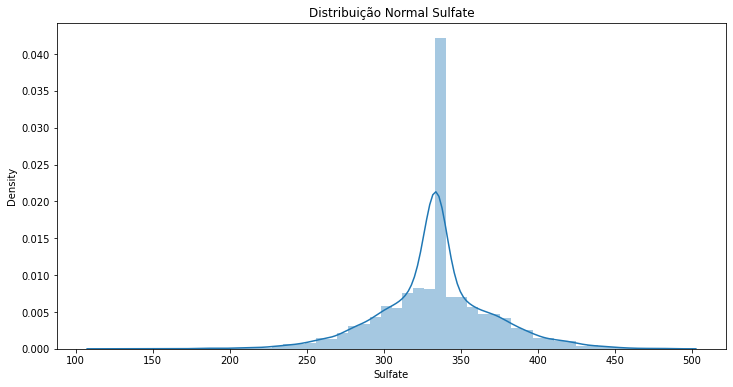

In [ ]:
plot_distribuicao('Sulfate')

##### Análise visual da distribuição dos dados:
- Novamente é possível visualizar a  distribuição do "Sulfate" (centralizado e "fino");
- A maioria dos atributos estão com distribuição bem centralizada, significando que a média e a mediana desses atributos resultem em valores muito parecidos;
- Se a média e a mediana estão com valores muito parecidos, os outliers que estão presentes nesse conjunto de dados não irão atrapalhar o modelo;
- Também é possível perceber que o atributo "Potability" é o atributo alvo (ou atributo saída, atributo meta ou rótulo), pois nele há apenas os valores 1 e 0, representando "potável" e "não potável";
- Olhando para a distribuição do atributo alvo, percebe-se que ele está desbalanceado (quando uma classe tem mais valores do que outra). Um conjunto de dados desbalanceados deixa o modelo enviesado, fazendo ele tender a classificar novos dados como sendo da classe que possui mais exemplos;

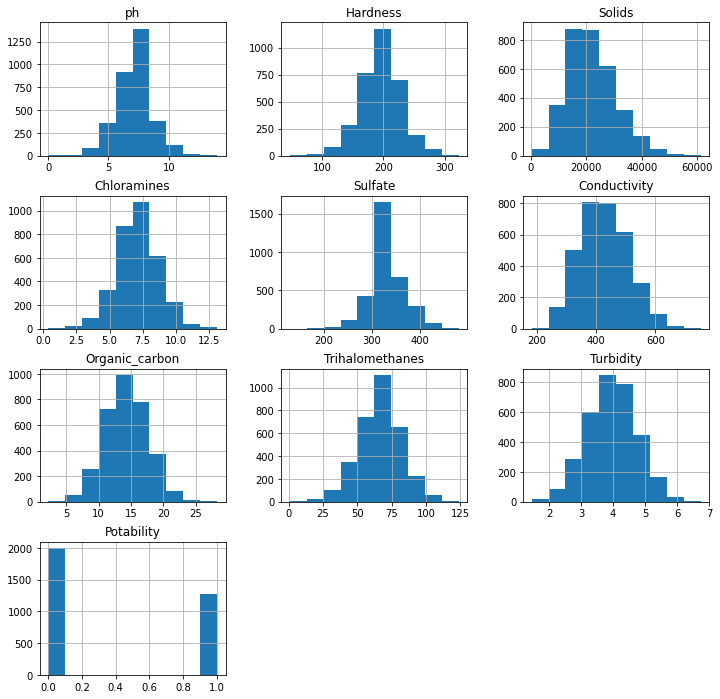

In [ ]:
dataset.hist(figsize=(12,12))
plt.savefig('/content/drive/MyDrive/histograma_dataset.png')

##### Análise do atributo alvo (rótulo):
- Como visto anteriormente, o dataset está desbalanceado, sendo possível visualizar valores mais específicos em relação a esse fenômeno, juntamente de um gráfico de pizza (visualização de valores qualitativos);
- Há mais objetos rotulados como classe 0 ("não potável"), significando que se algum modelo for treinado com os dados desse jeito, ele sempre tenderá a classificar novos dados como classe 0;
- Como tratamento existem basicamente dois métods: o NearMiss (reduz de forma aleatória os exemplos da classe majoritária) ou o Smote (gera dados sintéticos (não duplicados) da classe minoritária a partir de "vizinhos").

In [ ]:
balanceamento=dataset["Potability"].value_counts()
balanceamento

0    1998
1    1278
Name: Potability, dtype: int64

Text(0.5, 1.0, 'Gráfico de pizza (Atributo alvo)')

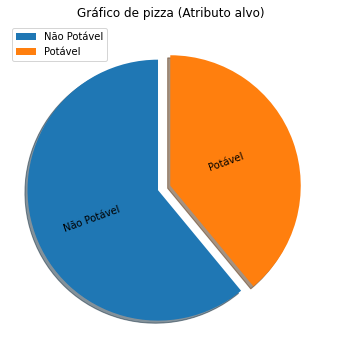

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(dataset['Potability'].value_counts(), explode=[0.1, 0], labels=['Não Potável', 'Potável'], 
        shadow=True, labeldistance=0.3, startangle=90, rotatelabels=True)

plt.legend()
plt.title('Gráfico de pizza (Atributo alvo)')

##### Gráficos:
- 1° gráfico:
  * No primeiro gráfico é possível visualizar que ambos os atributos possuem quase o mesmo desenho, significando que eles possuem quase os mesmos valores.
- 2° gráfico:
  * Visualização da média, mediana e média truncada (10%). A média é muito sensível a outliers, já a mediana e média truncada não.Logo, se a média resulta em um valor muito diferente da média truncada significa que os outliers estão distorcendo esse conjunto de dados. Porém, é possível notar que para todos os atributos, a média, mediana e média truncada estão muito próximos, significando que não será necessário se preocupar com os outliers do dataset.

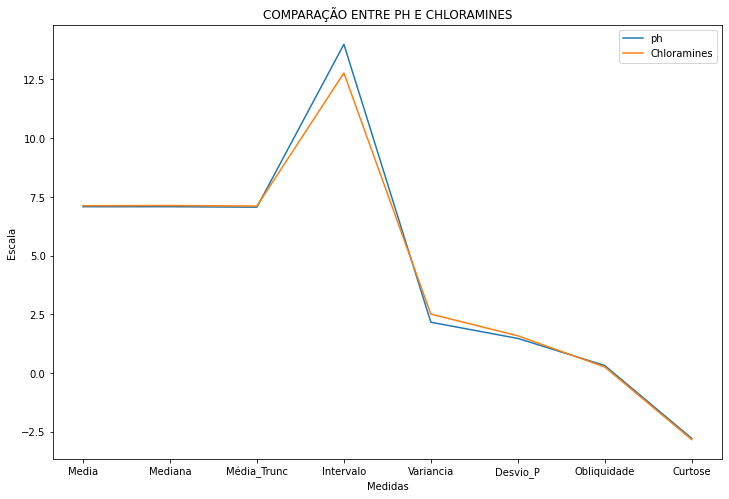

In [ ]:
plot_coluna(titulo='COMPARAÇÃO ENTRE PH E CHLORAMINES', coluna1='ph', coluna2='Chloramines')

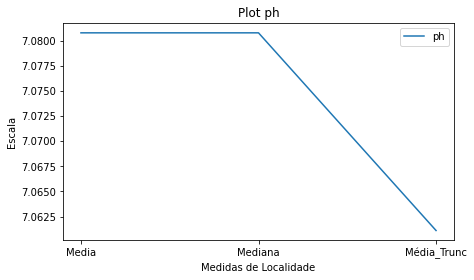

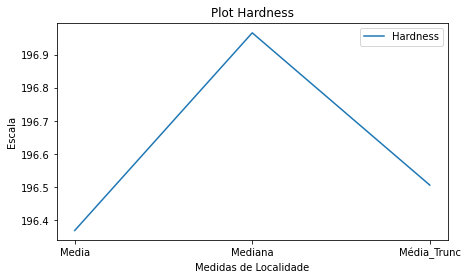

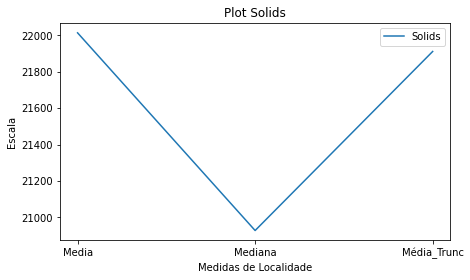

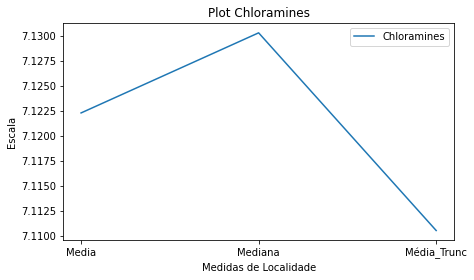

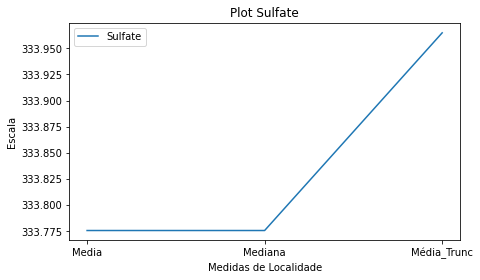

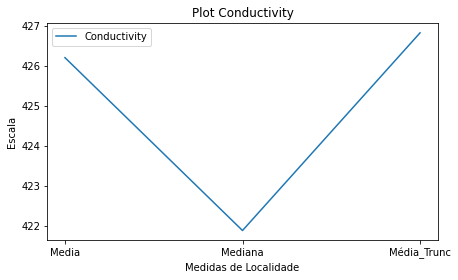

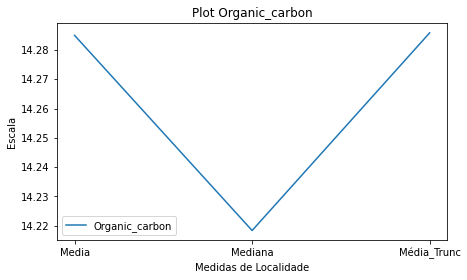

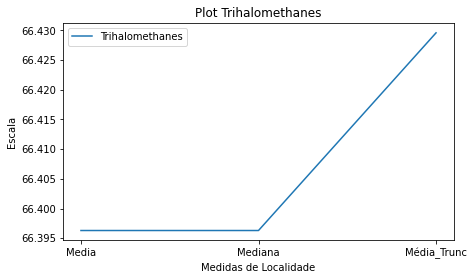

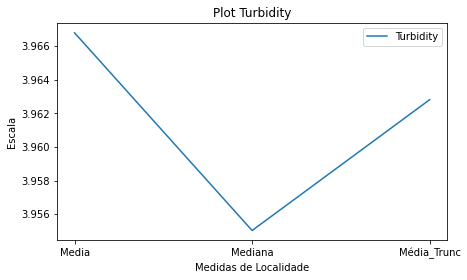

In [ ]:
colunas = df_dadosUnivariados.columns.to_list()
for i in colunas:
  plt.figure(figsize=(7,4))
  plot_medidas_localidade('Plot ' + str(i), i)
  plt.savefig('/content/drive/MyDrive/localidade_' + str(i) + '.png')
  plt.show()

# **EXPLORAÇÃO DE DADOS PARA DADOS MULTIVARIADOS**
- É considerado que o objeto possui mais de um atributo, ou seja, a análise foi realizada verificando as relações entre eles.

##### MATRIZ DE CORRELAÇÃO:
- A correlação mede tanto a força, como a direção da relação linear entre duas variáveis (sendo mais utilizada para analisar dados multivariados);
- Na matriz de correlação, cada elemento é a correlação entre dois atributos;
- A linha diagonal da esquerda para direita sempre será 1 (100% de correlação), pois é a correlação da variável com ela mesma;
- A tabela é simétrica (os valores que estão acima da linha diagonal são os mesmo que estão abaixo da linha);
- O objetivo é sempre uma correlação baixa entre todos atributos, pois significa que todos tem uma importancia e significado (um não é igual ao outro), além de uma correlação alta dos atributos com o atributo alvo;
- É possível perceber um ponto positivo: a correlação entre os atributos é baixa (próxima de 0). Porém a correlação dos atributos com o rótulo também está baixa;

Text(0.5, 1.0, 'Mapa Térmico da Correlação')

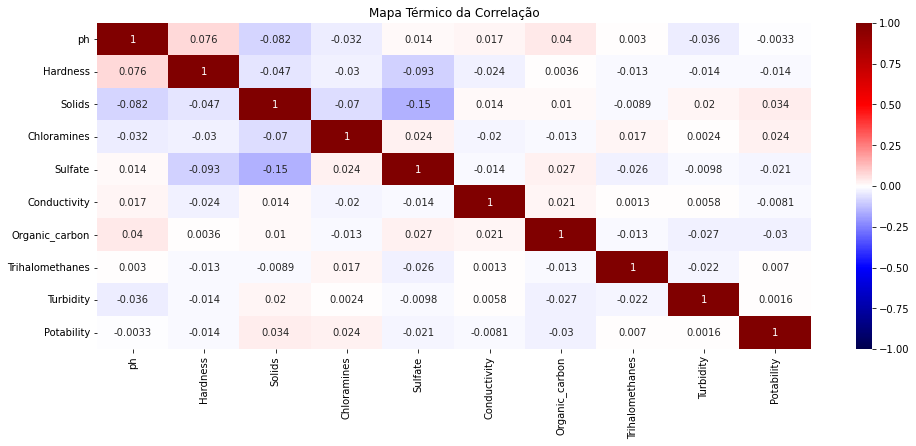

In [ ]:
matriz_corr = dataset.corr()

plt.figure(figsize=(16,6))
heatmap_corr = sns.heatmap(matriz_corr, cmap='seismic', vmin=-1, vmax=1, annot=True)
plt.title('Mapa Térmico da Correlação')

Text(0.5, 1.0, 'Mapa Térmico da Correlação Triangular')

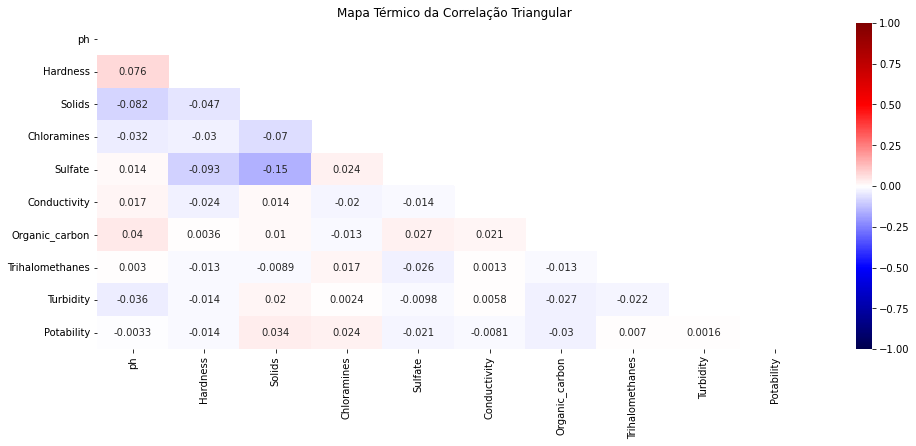

In [ ]:
plt.figure(figsize=(16,6))

mask = np.triu(np.ones_like(matriz_corr, dtype=np.bool))

heatmap_corr = sns.heatmap(matriz_corr, cmap='seismic', mask=mask, vmin=-1, vmax=1, annot=True)
plt.title('Mapa Térmico da Correlação Triangular')

##### SCATTER PLOT (PAIRPLOT):
- Gráfico para visualização de todas as relações entre dois atributos (também chamado de matriz de scatter plot);
- Ajuda na visualização dos dados para verificar se eles estão sobrepostos e  verificar a escala de cada atributo;



In [ ]:
from sklearn.preprocessing import StandardScaler

X = dataset.drop(['Potability'], axis=1)
y = dataset.Potability

scaler = StandardScaler().fit(X)
X_= scaler.transform(X)

dataset_normalizer = pd.DataFrame(data=X_,
                    columns=['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'])
dataset_normalizer['Potability']=y
dataset_normalizer

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-8.460387e-15,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,-1.572994e-15,2.062575,0.270597,-0.638480,0.684218,0
2,6.928678e-01,0.847665,-0.240047,1.360594,-1.572994e-15,-0.094032,0.781117,0.001509,-1.167365,0
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,0.018481,0.601124,1
3272,4.953704e-01,-0.085667,-0.534295,0.593290,-1.572994e-15,-0.417706,1.698560,0.000000,-1.497627,1
3273,1.591254e+00,-0.626829,1.270810,0.144017,-1.572994e-15,0.072263,-0.981329,0.218748,-0.856007,1
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,-1.572994e-15,-0.288597,-0.942064,0.703468,0.950797,1


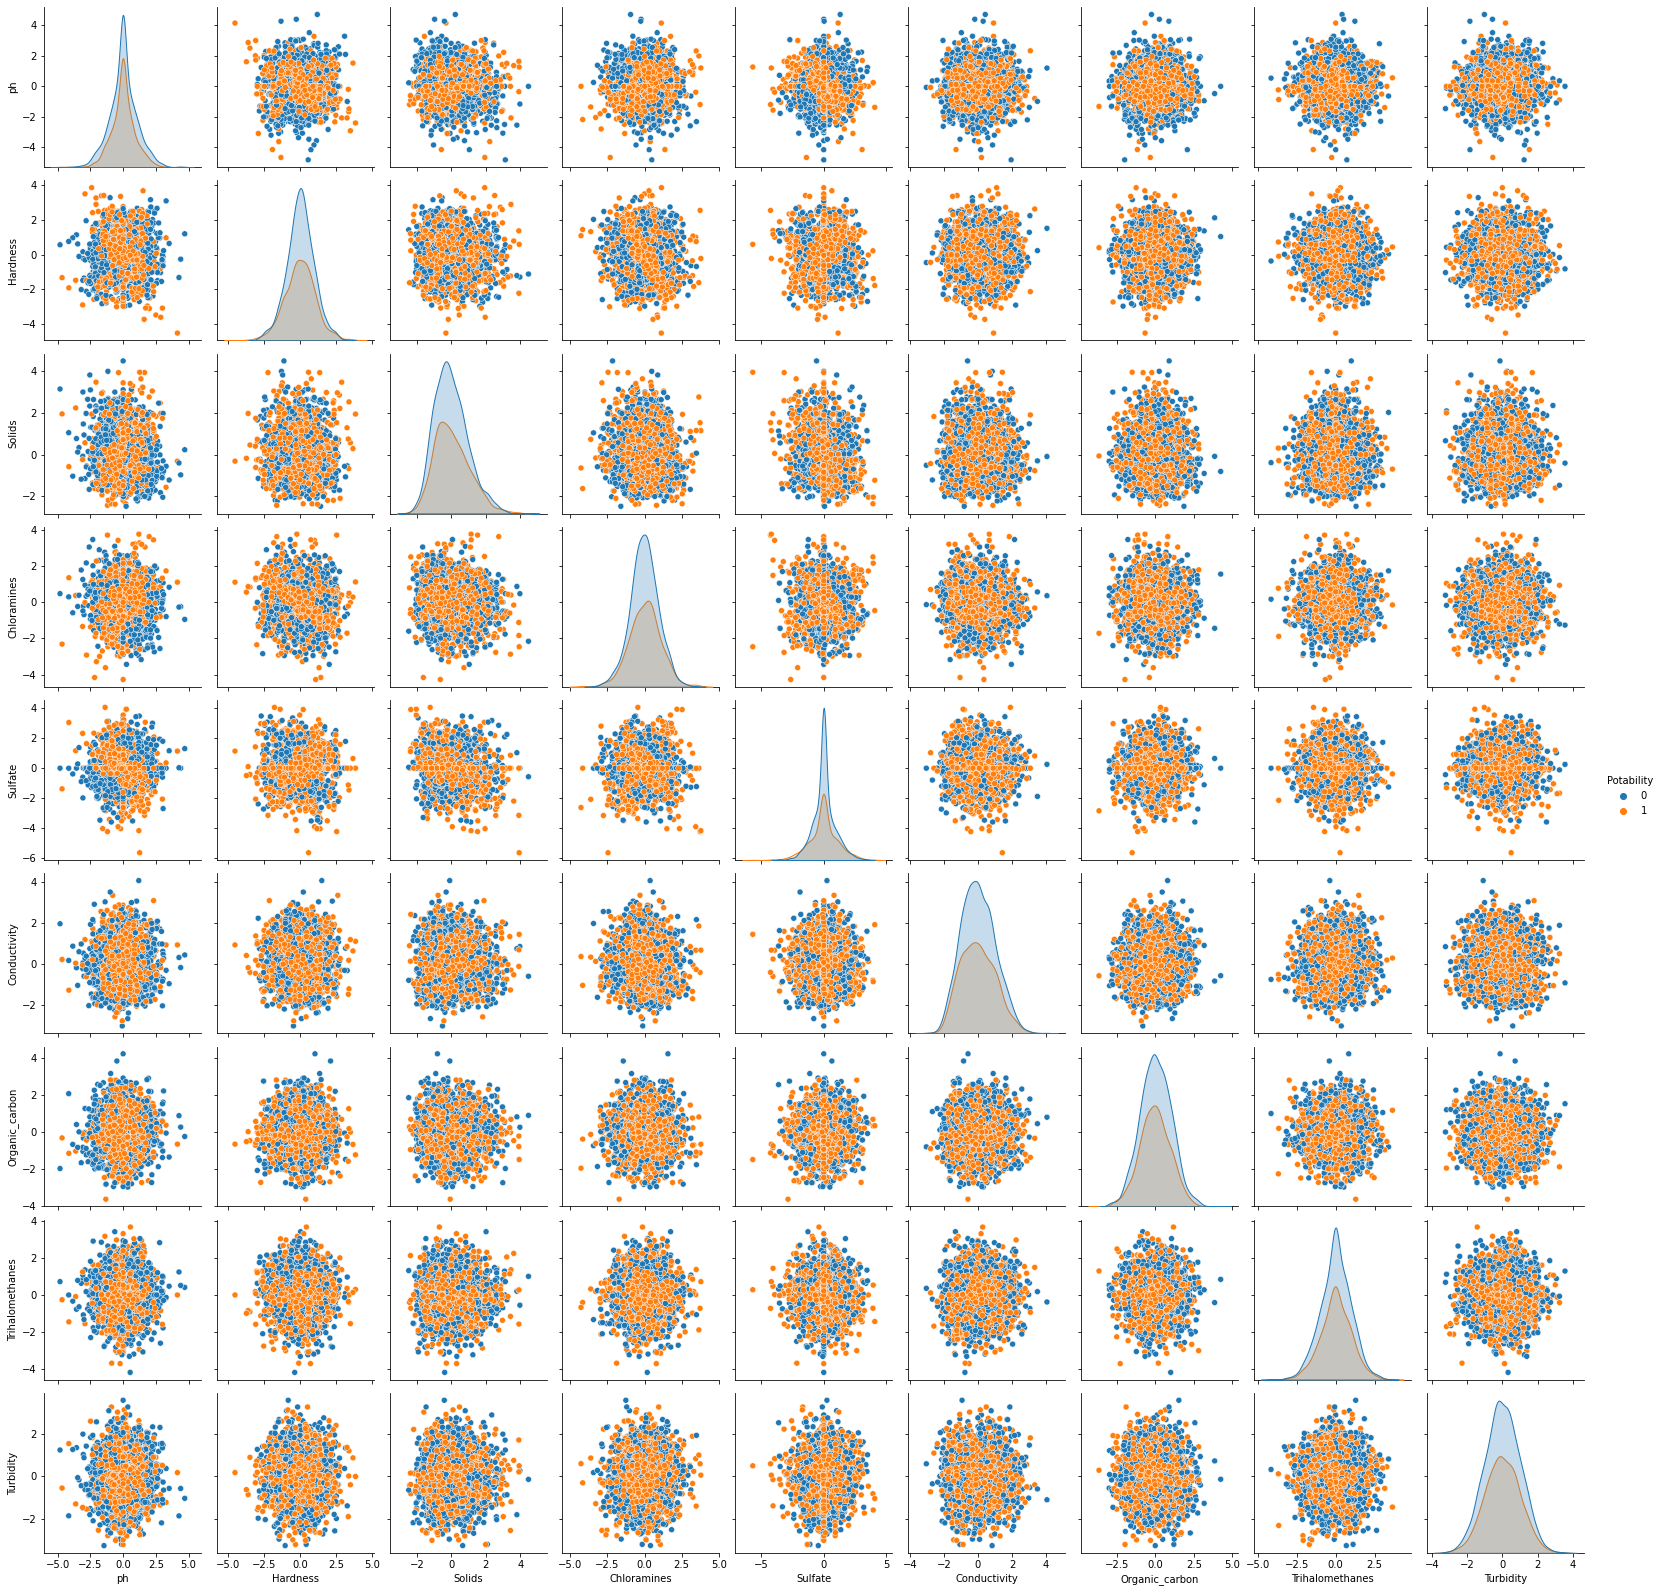

In [ ]:
sns.pairplot(dataset_normalizer, hue='Potability')
plt.savefig('/content/drive/MyDrive/matriz_graficoDispersao.png')
#Sulfato x Sulfato está bem fino por ter tido muitos dados faltantes